In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def problem(n):
    b = np.random.rand(n)
    w = np.random.rand(n)
    W = np.random.rand() * w.sum()
    
    return b, w, W

problem(10)

(array([0.11687795, 0.74625457, 0.50270597, 0.91303965, 0.94375919,
        0.27359967, 0.85220966, 0.03153179, 0.12005401, 0.53920097]),
 array([0.19941046, 0.92657588, 0.09538013, 0.31343566, 0.11019848,
        0.28096009, 0.80160573, 0.06141926, 0.83162709, 0.81647314]),
 3.288556946399307)

In [3]:
def greedy1(b, w, W):
    x = [0] * len(b)
    weight_sum = 0
    for i in sorted(range(len(b)), key=lambda i: b[i] / w[i]):
        x[i] = min(1.0, (W - weight_sum) / w[i])
        weight_sum += x[i] * w[i]
    
    return x

greedy1(*problem(10))

[0.0, 0.0, 0.0, 0.0, 0.2657941002197621, 0.0, 0.0, 0.0, 0.0, 0.0]

In [4]:
def greedy2(b, w, W):
    i = np.argsort(b / w)
    x = np.empty_like(i, dtype=float)
    x.put(i, np.clip((W - np.r_[0, np.cumsum(w[i])[:-1]]) / w[i], 0, 1))
    
    return x

greedy2(*problem(10))

array([0.70094528, 1.        , 0.        , 1.        , 0.        ,
       1.        , 1.        , 0.        , 1.        , 1.        ])

In [5]:
from time import perf_counter

def running_time(algorithm, n):
    p = problem(n)
    t0 = perf_counter()
    algorithm(*p)
    t1 = perf_counter()
    
    return t1 - t0

n = np.linspace(1, 100_000, 100, dtype=int)
t1 = np.vectorize(lambda size: running_time(greedy1, size))(n)
t2 = np.vectorize(lambda size: running_time(greedy2, size))(n)

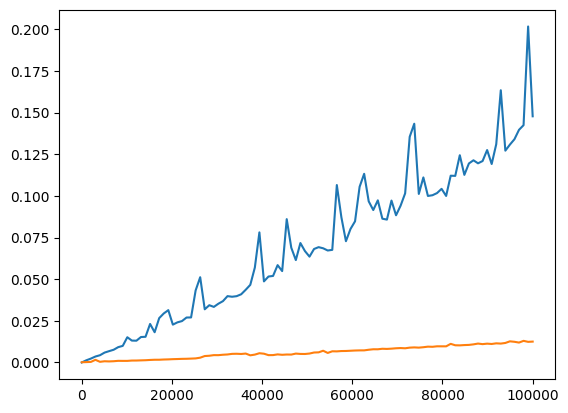

In [6]:
fig, ax = plt.subplots()
ax.plot(n, t1)
ax.plot(n, t2)
fig.show()
